In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
day = 1
matrix = 2 
sensor = 0
export_to_excel = False

In [32]:
with open(f"gunler/{day}/0{matrix}.bmerawdata") as f:
    j = json.load(f)

In [33]:
j["rawDataBody"]["dataColumns"]

[{'name': 'Sensor Index',
  'unit': '',
  'format': 'integer',
  'key': 'sensor_index',
  'colId': 1},
 {'name': 'Sensor ID',
  'unit': '',
  'format': 'integer',
  'key': 'sensor_id',
  'colId': 2},
 {'name': 'Time Since PowerOn',
  'unit': 'Milliseconds',
  'format': 'integer',
  'key': 'timestamp_since_poweron',
  'colId': 3},
 {'name': 'Real time clock',
  'unit': 'Unix Timestamp: seconds since Jan 01 1970. (UTC); 0 = missing',
  'format': 'integer',
  'key': 'real_time_clock',
  'colId': 4},
 {'name': 'Temperature',
  'unit': 'DegreesCelcius',
  'format': 'float',
  'key': 'temperature',
  'colId': 5},
 {'name': 'Pressure',
  'unit': 'Hectopascals',
  'format': 'float',
  'key': 'pressure',
  'colId': 6},
 {'name': 'Relative Humidity',
  'unit': 'Percent',
  'format': 'float',
  'key': 'relative_humidity',
  'colId': 7},
 {'name': 'Resistance Gassensor',
  'unit': 'Ohms',
  'format': 'float',
  'key': 'resistance_gassensor',
  'colId': 8},
 {'name': 'Heater Profile Step Index',
  

In [34]:
column_names = [el["name"] for el in j["rawDataBody"]["dataColumns"]]
column_names

['Sensor Index',
 'Sensor ID',
 'Time Since PowerOn',
 'Real time clock',
 'Temperature',
 'Pressure',
 'Relative Humidity',
 'Resistance Gassensor',
 'Heater Profile Step Index',
 'Scanning Mode Enabled',
 'Scanning Cycle Index',
 'Label Tag',
 'Error Code']

In [35]:
df = pd.DataFrame(j["rawDataBody"]["dataBlock"], columns=column_names)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23618 entries, 0 to 23617
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sensor Index               23618 non-null  int64  
 1   Sensor ID                  23618 non-null  int64  
 2   Time Since PowerOn         23618 non-null  int64  
 3   Real time clock            23618 non-null  int64  
 4   Temperature                23618 non-null  float64
 5   Pressure                   23618 non-null  float64
 6   Relative Humidity          23618 non-null  float64
 7   Resistance Gassensor       23618 non-null  float64
 8   Heater Profile Step Index  23618 non-null  int64  
 9   Scanning Mode Enabled      23618 non-null  int64  
 10  Scanning Cycle Index       23618 non-null  int64  
 11  Label Tag                  23618 non-null  int64  
 12  Error Code                 23618 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 2.3 MB


In [37]:
df.describe().apply(lambda x: x.apply("{0:,.2f}".format))[
    ["Temperature", "Pressure", "Relative Humidity", "Resistance Gassensor"]]

,Temperature,Pressure,Relative Humidity,Resistance Gassensor
count,"23,618.00","23,618.00","23,618.00","23,618.00"
mean,40.35,922.55,29.54,"27,719,688.18"
std,1.87,0.24,6.37,"38,560,813.18"
min,29.49,921.87,18.49,"101,567.15"
25%,39.81,922.37,23.24,"2,589,946.25"
50%,40.80,922.58,29.71,"5,645,761.50"
75%,41.49,922.72,35.98,"30,312,674.00"
max,43.82,923.63,46.58,"102,400,000.00"


In [38]:
if export_to_excel:
    df.to_excel(f"{day}_0{matrix}.xlsx")

In [39]:
sensor_indexes = sorted(df["Sensor Index"].unique())
sensor_indexes

[0, 1, 2, 3, 4, 5, 6, 7]

In [40]:
sensor = df[df["Sensor Index"] == sensor]
sensor.head(25)

,Sensor Index,Sensor ID,Time Since PowerOn,Real time clock,Temperature,Pressure,Relative Humidity,Resistance Gassensor,Heater Profile Step Index,Scanning Mode Enabled,Scanning Cycle Index,Label Tag,Error Code
0,0,355899974,7079,1727089587,29.562128,921.992310,46.577160,9.619540e+05,0,1,1,0,0
2,0,355899974,7359,1727089587,29.490536,922.075073,46.377636,3.714140e+07,1,1,1,0,0
4,0,355899974,8759,1727089588,29.660873,922.064575,45.070419,3.370326e+07,2,1,1,0,0
14,0,355899974,12959,1727089593,29.962051,922.067017,41.824688,2.981620e+07,3,1,1,0,0
20,0,355899974,13659,1727089593,30.463192,922.032959,41.493591,3.198750e+06,4,1,1,0,0
22,0,355899974,14359,1727089594,30.774246,922.046326,41.093197,3.331436e+06,5,1,1,0,0
24,0,355899974,15059,1727089595,30.900150,922.033569,40.642559,3.431923e+06,6,1,1,0,0
30,0,355899974,15759,1727089595,31.129740,922.004761,40.216557,1.387064e+06,7,1,1,0,0
35,0,355899974,16459,1727089596,31.440796,922.039734,39.794582,2.131114e+06,8,1,1,0,0
38,0,355899974,17170,1727089597,31.576574,922.023010,39.318298,2.700066e+06,9,1,1,0,0


In [41]:
heater_idx_1 = sorted(sensor["Heater Profile Step Index"].unique())
heater_idx_1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [42]:
sensors = {}
for i in sensor_indexes:
    sensors[i] = {}
    sensor = df[df["Sensor Index"] == i]
    heater_indexes = sorted(sensor["Heater Profile Step Index"].unique())
    for j in heater_indexes:
        sensors[i][j] = sensor[sensor["Heater Profile Step Index"] == j]

In [43]:
def plot_sensor(sensor):
    plt.figure(figsize=(12, 6))
    plt.title(f"Sensor {sensor}")
    # plt.yscale("log")
    for profile_idx in sensors[sensor]: 
        plt.plot(sensors[sensor][profile_idx]["Resistance Gassensor"])
    plt.show()

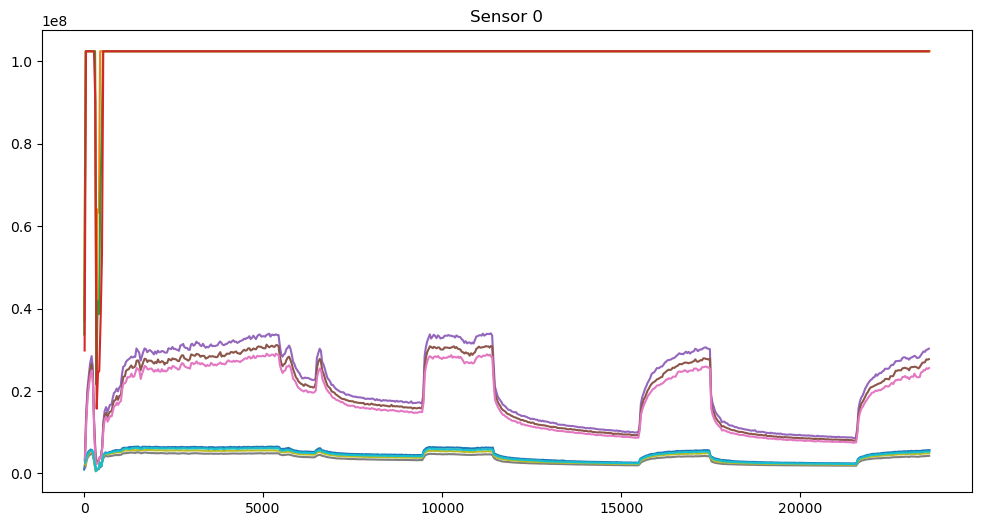

In [44]:
plot_sensor(0)

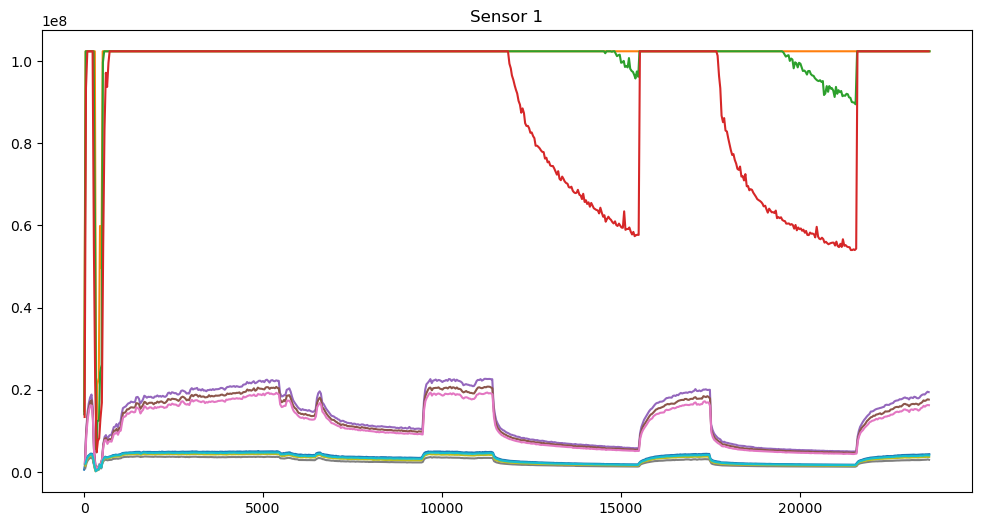

In [45]:
plot_sensor(1)

In [46]:
sensor_0_df = df[df["Sensor Index"] == 0]
sensor_1_df = df[df["Sensor Index"] == 1]

In [47]:
air_0_df = sensor_0_df[sensor_0_df["Time Since PowerOn"].between(0.6e6, 1.5e6)]
air_1_df = sensor_1_df[sensor_1_df["Time Since PowerOn"].between(0.6e6, 1.5e6)]

In [48]:
air_0_df[air_0_df["Heater Profile Step Index"] == 4].head()

,Sensor Index,Sensor ID,Time Since PowerOn,Real time clock,Temperature,Pressure,Relative Humidity,Resistance Gassensor,Heater Profile Step Index,Scanning Mode Enabled,Scanning Cycle Index,Label Tag,Error Code
2020,0,355899974,600263,1727090180,36.919044,922.153870,27.045347,29062528.0,4,1,1,0,0
2059,0,355899974,611073,1727090191,36.882011,922.154663,27.025688,29775556.0,4,1,1,0,0
2095,0,355899974,622023,1727090202,37.020267,922.164795,26.894011,29394932.0,4,1,1,0,0
2133,0,355899974,632833,1727090213,37.158524,922.141479,26.789911,29434538.0,4,1,1,0,0
2167,0,355899974,643643,1727090223,37.035080,922.159607,26.752075,29674440.0,4,1,1,0,0


In [49]:
air_1_df[air_1_df["Heater Profile Step Index"] == 4].head()

,Sensor Index,Sensor ID,Time Since PowerOn,Real time clock,Temperature,Pressure,Relative Humidity,Resistance Gassensor,Heater Profile Step Index,Scanning Mode Enabled,Scanning Cycle Index,Label Tag,Error Code
2047,1,355895365,608549,1727090188,37.277443,922.263489,25.894535,18634064.0,4,1,1,0,0
2085,1,355895365,619359,1727090199,37.382233,922.262329,25.765289,18367714.0,4,1,1,0,0
2126,1,355895365,630169,1727090210,37.556885,922.271545,25.713329,18507766.0,4,1,1,0,0
2158,1,355895365,640979,1727090221,37.462074,922.307312,25.661615,18321498.0,4,1,1,0,0
2198,1,355895365,651789,1727090231,37.394707,922.278503,25.738760,18539180.0,4,1,1,0,0
